# Tutorial 2 - RNN Time Series

In this notebook, we will predict the stock market for Amazon

## https://finance.yahoo.com/quote/AMZN/history?period1=1669334400&period2=1682035200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

In [2]:
import pandas as pd

amazon = pd.read_csv('amazon.csv')

amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/25/22,93.790001,94.430000,93.070000,93.410004,93.410004,35088600
1,11/28/22,93.930000,96.400002,93.430000,93.949997,93.949997,74943100
2,11/29/22,94.040001,94.410004,91.440002,92.419998,92.419998,65567300
3,11/30/22,92.470001,96.540001,91.529999,96.540001,96.540001,102805800
4,12/1/22,96.989998,97.230003,94.919998,95.500000,95.500000,68488000


In [3]:
amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/25/22,93.790001,94.430000,93.070000,93.410004,93.410004,35088600
1,11/28/22,93.930000,96.400002,93.430000,93.949997,93.949997,74943100
2,11/29/22,94.040001,94.410004,91.440002,92.419998,92.419998,65567300
3,11/30/22,92.470001,96.540001,91.529999,96.540001,96.540001,102805800
4,12/1/22,96.989998,97.230003,94.919998,95.500000,95.500000,68488000
...,...,...,...,...,...,...,...
95,4/14/23,102.070000,103.199997,101.110001,102.510002,102.510002,51388300
96,4/17/23,103.160004,103.730003,101.589996,102.739998,102.739998,39919500
97,4/18/23,103.949997,104.199997,101.519997,102.300003,102.300003,39790500
98,4/19/23,101.580002,105.120003,101.389999,104.300003,104.300003,58398900


In [4]:
#Drop the columns we don't need

amazon = amazon.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [5]:
amazon

,Date,Close
0,11/25/22,93.410004
1,11/28/22,93.949997
2,11/29/22,92.419998
3,11/30/22,96.540001
4,12/1/22,95.500000
...,...,...
95,4/14/23,102.510002
96,4/17/23,102.739998
97,4/18/23,102.300003
98,4/19/23,104.300003


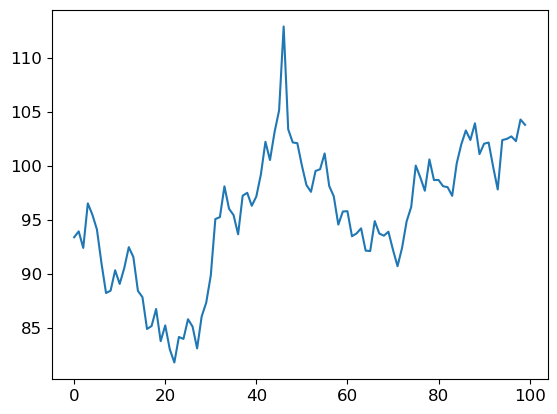

In [6]:
#Plot market

plt.plot(amazon['Close'])
plt.show()

# Data Cleanup

In [7]:
# Remove all null values

amazon = amazon.dropna().reset_index(drop=True)

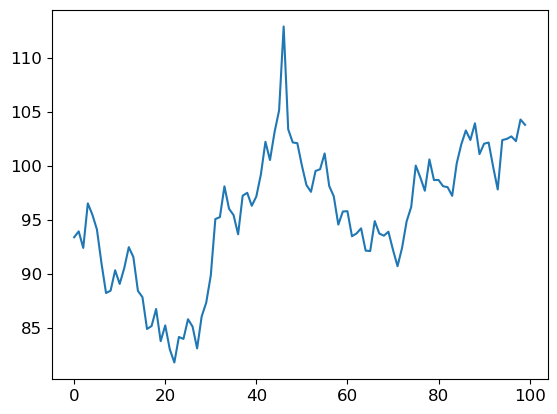

In [8]:
plt.plot(amazon['Close'])
plt.show()

## RESHAPE the data set!

In [9]:
amazon.shape

(100, 2)

In [10]:
amazon.shape[0]/10

10.0

In [11]:
amazon.groupby(['Date']).count()

,Close
Date,
1/10/23,1
1/11/23,1
1/12/23,1
1/13/23,1
1/17/23,1
...,...
4/20/23,1
4/3/23,1
4/4/23,1


In [12]:
# Re-organize the data set

market = np.array(amazon['Close']).reshape(10,10)

market

array([[ 93.410004,  93.949997,  92.419998,  96.540001,  95.5     ,
         94.129997,  91.010002,  88.25    ,  88.459999,  90.349998],
       [ 89.089996,  90.550003,  92.489998,  91.580002,  88.449997,
         87.860001,  84.919998,  85.190002,  86.769997,  83.790001],
       [ 85.25    ,  83.040001,  81.82    ,  84.18    ,  84.      ,
         85.82    ,  85.139999,  83.120003,  86.080002,  87.360001],
       [ 89.870003,  95.089996,  95.269997,  98.120003,  96.050003,
         95.459999,  93.68    ,  97.25    ,  97.519997,  96.32    ],
       [ 97.18    ,  99.220001, 102.239998, 100.550003, 103.129997,
        105.150002, 112.910004, 103.389999, 102.18    , 102.110001],
       [100.050003,  98.239998,  97.610001,  99.540001,  99.699997,
        101.160004,  98.150002,  97.199997,  94.580002,  95.790001],
       [ 95.82    ,  93.5     ,  93.760002,  94.230003,  92.169998,
         92.129997,  94.900002,  93.75    ,  93.550003,  93.919998],
       [ 92.25    ,  90.730003,  92.43   

In [13]:
# Convert to dataframe

market_df = pd.DataFrame(market, columns=np.arange(0,10,1))

market_df

,0,1,2,3,4,5,6,7,8,9
0,93.410004,93.949997,92.419998,96.540001,95.500000,94.129997,91.010002,88.250000,88.459999,90.349998
1,89.089996,90.550003,92.489998,91.580002,88.449997,87.860001,84.919998,85.190002,86.769997,83.790001
2,85.250000,83.040001,81.820000,84.180000,84.000000,85.820000,85.139999,83.120003,86.080002,87.360001
3,89.870003,95.089996,95.269997,98.120003,96.050003,95.459999,93.680000,97.250000,97.519997,96.320000
4,97.180000,99.220001,102.239998,100.550003,103.129997,105.150002,112.910004,103.389999,102.180000,102.110001
5,100.050003,98.239998,97.610001,99.540001,99.699997,101.160004,98.150002,97.199997,94.580002,95.790001
6,95.820000,93.500000,93.760002,94.230003,92.169998,92.129997,94.900002,93.750000,93.550003,93.919998
7,92.250000,90.730003,92.430000,94.879997,96.199997,100.040001,98.949997,97.709999,100.610001,98.699997
8,98.709999,98.129997,98.040001,97.239998,100.250000,102.000000,103.290001,102.410004,103.949997,101.099998
9,102.059998,102.169998,99.919998,97.830002,102.400002,102.510002,102.739998,102.300003,104.300003,103.809998


# Reshape for Standardizing Data

In [14]:
# Let's create a single sequence (i.e., feature) for standardization

market_1feature = np.array(market_df).ravel().reshape(-1,1)

market_1feature.shape

(100, 1)

In [15]:
market_1feature

array([[ 93.410004],
       [ 93.949997],
       [ 92.419998],
       [ 96.540001],
       [ 95.5     ],
       [ 94.129997],
       [ 91.010002],
       [ 88.25    ],
       [ 88.459999],
       [ 90.349998],
       [ 89.089996],
       [ 90.550003],
       [ 92.489998],
       [ 91.580002],
       [ 88.449997],
       [ 87.860001],
       [ 84.919998],
       [ 85.190002],
       [ 86.769997],
       [ 83.790001],
       [ 85.25    ],
       [ 83.040001],
       [ 81.82    ],
       [ 84.18    ],
       [ 84.      ],
       [ 85.82    ],
       [ 85.139999],
       [ 83.120003],
       [ 86.080002],
       [ 87.360001],
       [ 89.870003],
       [ 95.089996],
       [ 95.269997],
       [ 98.120003],
       [ 96.050003],
       [ 95.459999],
       [ 93.68    ],
       [ 97.25    ],
       [ 97.519997],
       [ 96.32    ],
       [ 97.18    ],
       [ 99.220001],
       [102.239998],
       [100.550003],
       [103.129997],
       [105.150002],
       [112.910004],
       [103.3

## Standardize the values

In [16]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

market_std = scaler.fit_transform(market_1feature)

In [17]:
market_reshaped =market_std.reshape(10,10)

market_reshaped.shape

(10, 10)

In [18]:
#Pandas version of the reshaped data

pd.DataFrame(market_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-0.324611,-0.236800,-0.485601,0.184373,0.015253,-0.207529,-0.714887,-1.163704,-1.129555,-0.822213
1,-1.027108,-0.789689,-0.474218,-0.622196,-1.131181,-1.227123,-1.705211,-1.661305,-1.404374,-1.888966
2,-1.651548,-2.010927,-2.209317,-1.825546,-1.854817,-1.558858,-1.669436,-1.997917,-1.516578,-1.308431
3,-0.900267,-0.051419,-0.022149,0.441304,0.104692,0.008749,-0.280706,0.299829,0.343735,0.148597
4,0.288446,0.620180,1.111277,0.836458,1.256004,1.584486,2.846377,1.298284,1.101520,1.090137
5,0.755151,0.460817,0.358371,0.672217,0.698235,0.935654,0.446183,0.291698,-0.134352,0.062412
6,0.067290,-0.309976,-0.267696,-0.191267,-0.526254,-0.532759,-0.082315,-0.269323,-0.301845,-0.241678
7,-0.513245,-0.760419,-0.483974,-0.085568,0.129083,0.753525,0.576274,0.374632,0.846215,0.535620
8,0.537247,0.442930,0.428295,0.298203,0.787673,1.072249,1.282023,1.138922,1.389348,0.925896
9,1.082006,1.099894,0.734010,0.394146,1.137296,1.155183,1.192584,1.121034,1.446264,1.366582


# Split the Data

**In certain cases, we cannot use a random split. For example, if we are trying to predict the stock market, we cannot use a random split. We need to use a chronological split.**

BUT, keep in mind if we have something like hourly readings of dayly temperature, we can use a random split on days, but the sequence of the temperature within the day is important to remain sequential.

In this case, we are using a random spli because each day as an independent sample.

In [19]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(temp_reshaped, test_size=0.3)

# if we neede to maintain the ordering of the data, we can use the following code to split the data
split_point = int(len(market_reshaped)*0.7)
train, test = market_reshaped[:split_point], market_reshaped[split_point:]

In [20]:
train.shape

(7, 10)

In [21]:
train

array([[-0.32461097, -0.23680013, -0.48560058,  0.18437281,  0.01525327,
        -0.20752947, -0.71488677, -1.1637039 , -1.12955496, -0.82221318],
       [-1.02710813, -0.78968941, -0.47421755, -0.62219635, -1.13118143,
        -1.2271235 , -1.70521145, -1.6613048 , -1.40437426, -1.88896566],
       [-1.65154824, -2.01092675, -2.20931694, -1.82554606, -1.85481672,
        -1.55885782, -1.66943603, -1.99791724, -1.51657765, -1.30843089],
       [-0.90026746, -0.05141944, -0.02214862,  0.44130449,  0.10469189,
         0.00874852, -0.28070563,  0.29982914,  0.34373464,  0.14859739],
       [ 0.2884461 ,  0.62018042,  1.11127657,  0.83645841,  1.25600357,
         1.58448624,  2.84637727,  1.29828373,  1.10152001,  1.09013714],
       [ 0.75515101,  0.46081745,  0.35837062,  0.67221715,  0.69823486,
         0.93565358,  0.44618277,  0.29169791, -0.134352  ,  0.06241172],
       [ 0.06729   , -0.30997629, -0.26769613, -0.19126702, -0.52625428,
        -0.53275903, -0.08231527, -0.2693226 

In [22]:
test.shape

(3, 10)

In [23]:
test

array([[-0.51324477, -0.76041875, -0.48397411, -0.08556838,  0.12908313,
         0.75352454,  0.57627378,  0.37463177,  0.84621497,  0.53562008],
       [ 0.53724656,  0.44292966,  0.42829498,  0.29820266,  0.78767348,
         1.07224935,  1.28202258,  1.13892206,  1.38934769,  0.92589572],
       [ 1.08200591,  1.09989354,  0.73401028,  0.39414604,  1.13729559,
         1.15518321,  1.19258396,  1.12103427,  1.44626384,  1.36658178]])

# Create Input and Target values

In [24]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,-0.324611,-0.236800,-0.485601,0.184373,0.015253,-0.207529,-0.714887,-1.163704,-1.129555
1,-1.027108,-0.789689,-0.474218,-0.622196,-1.131181,-1.227123,-1.705211,-1.661305,-1.404374
2,-1.651548,-2.010927,-2.209317,-1.825546,-1.854817,-1.558858,-1.669436,-1.997917,-1.516578
3,-0.900267,-0.051419,-0.022149,0.441304,0.104692,0.008749,-0.280706,0.299829,0.343735
4,0.288446,0.620180,1.111277,0.836458,1.256004,1.584486,2.846377,1.298284,1.101520
5,0.755151,0.460817,0.358371,0.672217,0.698235,0.935654,0.446183,0.291698,-0.134352
6,0.067290,-0.309976,-0.267696,-0.191267,-0.526254,-0.532759,-0.082315,-0.269323,-0.301845


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [25]:
train_inputs

array([[-0.32461097, -0.23680013, -0.48560058,  0.18437281,  0.01525327,
        -0.20752947, -0.71488677, -1.1637039 , -1.12955496],
       [-1.02710813, -0.78968941, -0.47421755, -0.62219635, -1.13118143,
        -1.2271235 , -1.70521145, -1.6613048 , -1.40437426],
       [-1.65154824, -2.01092675, -2.20931694, -1.82554606, -1.85481672,
        -1.55885782, -1.66943603, -1.99791724, -1.51657765],
       [-0.90026746, -0.05141944, -0.02214862,  0.44130449,  0.10469189,
         0.00874852, -0.28070563,  0.29982914,  0.34373464],
       [ 0.2884461 ,  0.62018042,  1.11127657,  0.83645841,  1.25600357,
         1.58448624,  2.84637727,  1.29828373,  1.10152001],
       [ 0.75515101,  0.46081745,  0.35837062,  0.67221715,  0.69823486,
         0.93565358,  0.44618277,  0.29169791, -0.134352  ],
       [ 0.06729   , -0.30997629, -0.26769613, -0.19126702, -0.52625428,
        -0.53275903, -0.08231527, -0.2693226 , -0.30184507]])

In [26]:
train_inputs.shape 

(7, 9)

In [27]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [28]:
train_x

array([[[-0.32461097],
        [-0.23680013],
        [-0.48560058],
        [ 0.18437281],
        [ 0.01525327],
        [-0.20752947],
        [-0.71488677],
        [-1.1637039 ],
        [-1.12955496]],

       [[-1.02710813],
        [-0.78968941],
        [-0.47421755],
        [-0.62219635],
        [-1.13118143],
        [-1.2271235 ],
        [-1.70521145],
        [-1.6613048 ],
        [-1.40437426]],

       [[-1.65154824],
        [-2.01092675],
        [-2.20931694],
        [-1.82554606],
        [-1.85481672],
        [-1.55885782],
        [-1.66943603],
        [-1.99791724],
        [-1.51657765]],

       [[-0.90026746],
        [-0.05141944],
        [-0.02214862],
        [ 0.44130449],
        [ 0.10469189],
        [ 0.00874852],
        [-0.28070563],
        [ 0.29982914],
        [ 0.34373464]],

       [[ 0.2884461 ],
        [ 0.62018042],
        [ 1.11127657],
        [ 0.83645841],
        [ 1.25600357],
        [ 1.58448624],
        [ 2.84637727],
   

## Set the target

In [29]:
# The last column is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-0.822213
1,-1.888966
2,-1.308431
3,0.148597
4,1.090137
5,0.062412
6,-0.241678


## Repeat for TEST

In [30]:
test.shape

(3, 10)

In [31]:
test

array([[-0.51324477, -0.76041875, -0.48397411, -0.08556838,  0.12908313,
         0.75352454,  0.57627378,  0.37463177,  0.84621497,  0.53562008],
       [ 0.53724656,  0.44292966,  0.42829498,  0.29820266,  0.78767348,
         1.07224935,  1.28202258,  1.13892206,  1.38934769,  0.92589572],
       [ 1.08200591,  1.09989354,  0.73401028,  0.39414604,  1.13729559,
         1.15518321,  1.19258396,  1.12103427,  1.44626384,  1.36658178]])

In [32]:
test_inputs = test[:, :9]

In [33]:
test_inputs

array([[-0.51324477, -0.76041875, -0.48397411, -0.08556838,  0.12908313,
         0.75352454,  0.57627378,  0.37463177,  0.84621497],
       [ 0.53724656,  0.44292966,  0.42829498,  0.29820266,  0.78767348,
         1.07224935,  1.28202258,  1.13892206,  1.38934769],
       [ 1.08200591,  1.09989354,  0.73401028,  0.39414604,  1.13729559,
         1.15518321,  1.19258396,  1.12103427,  1.44626384]])

In [34]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(3, 9, 1)

In [35]:
test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,0.535620
1,0.925896
2,1.366582


In [36]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [37]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 260ms/step - loss: 0.6669
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6329
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.6005
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5699
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5409
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.5136
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4878
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4636
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4409
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4197
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3997
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3810
Epoch 13/100
1/1 [==============================] - 0s 2ms/

### Predictions

In [38]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 40ms/step


In [39]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [40]:
comparison

,actual,predicted
0,98.699997,97.490318
1,101.099998,97.785789
2,103.809998,96.093056


In [41]:
cs_nn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [42]:
performance = pd.concat([performance, pd.DataFrame({'model':"Cross NN", 'MSE': cs_nn}, index =[0])])
performance

,model,MSE
0,Cross NN,23.9995


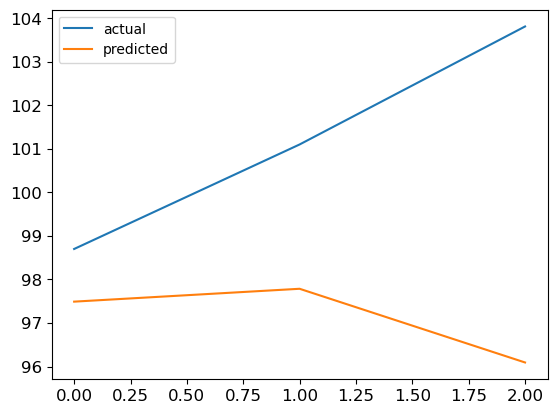

In [43]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [44]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 305ms/step - loss: 0.8144
Epoch 2/30
1/1 [==============================] - 0s 3ms/step - loss: 0.7660
Epoch 3/30
1/1 [==============================] - 0s 2ms/step - loss: 0.7231
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6846
Epoch 5/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6484
Epoch 6/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6136
Epoch 7/30
1/1 [==============================] - 0s 2ms/step - loss: 0.5812
Epoch 8/30
1/1 [==============================] - 0s 3ms/step - loss: 0.5517
Epoch 9/30
1/1 [==============================] - 0s 3ms/step - loss: 0.5242
Epoch 10/30
1/1 [==============================] - 0s 3ms/step - loss: 0.4983
Epoch 11/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4731
Epoch 12/30
1/1 [==============================] - 0s 2ms/step - loss: 0.4489
Epoch 13/30
1/1 [==============================] - 0s 2ms/step - loss: 

### Predictions

In [46]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 71ms/step


In [47]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [48]:
comparison

,actual,predicted
0,98.699997,98.058800
1,101.099998,101.108711
2,103.809998,100.929008


In [49]:
s_rnn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [50]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN", 'MSE' : s_rnn}, index =[0])])
performance

,model,MSE
0,Cross NN,23.99950
0,Simple RNN,2.90377


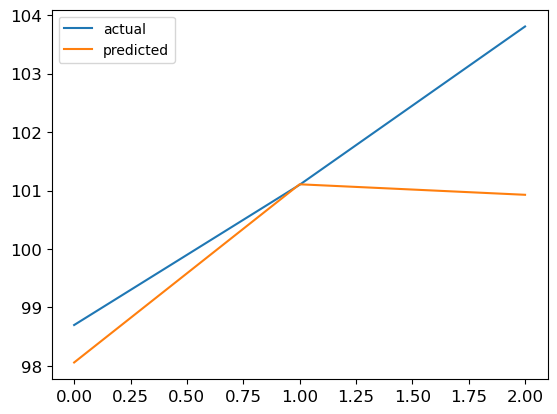

In [51]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [52]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 496ms/step - loss: 0.5894
Epoch 2/30
1/1 [==============================] - 0s 4ms/step - loss: 0.5006
Epoch 3/30
1/1 [==============================] - 0s 4ms/step - loss: 0.4315
Epoch 4/30
1/1 [==============================] - 0s 4ms/step - loss: 0.3738
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3242
Epoch 6/30
1/1 [==============================] - 0s 5ms/step - loss: 0.2808
Epoch 7/30
1/1 [==============================] - 0s 4ms/step - loss: 0.2419
Epoch 8/30
1/1 [==============================] - 0s 3ms/step - loss: 0.2079
Epoch 9/30
1/1 [==============================] - 0s 4ms/step - loss: 0.1801
Epoch 10/30
1/1 [==============================] - 0s 5ms/step - loss: 0.1601
Epoch 11/30
1/1 [==============================] - 0s 4ms/step - loss: 0.1416
Epoch 12/30
1/1 [==============================] - 0s 4ms/step - loss: 0.1236
Epoch 13/30
1/1 [==============================] - 0s 3ms/step - loss: 

### Predictions

In [54]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 96ms/step


In [55]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [56]:
comparison

,actual,predicted
0,98.699997,98.160835
1,101.099998,101.179741
2,103.809998,101.364212


In [57]:
sml_rnn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [58]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN more layers", 'MSE' : sml_rnn}, index =[0])])
performance

,model,MSE
0,Cross NN,23.999500
0,Simple RNN,2.903770
0,Simple RNN more layers,2.092974


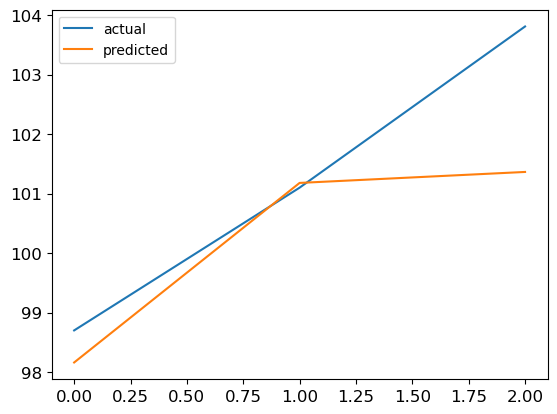

In [59]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [60]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 430ms/step - loss: 1.2319
Epoch 2/30
1/1 [==============================] - 0s 4ms/step - loss: 1.1975
Epoch 3/30
1/1 [==============================] - 0s 4ms/step - loss: 1.1634
Epoch 4/30
1/1 [==============================] - 0s 3ms/step - loss: 1.1298
Epoch 5/30
1/1 [==============================] - 0s 4ms/step - loss: 1.0965
Epoch 6/30
1/1 [==============================] - 0s 5ms/step - loss: 1.0637
Epoch 7/30
1/1 [==============================] - 0s 4ms/step - loss: 1.0312
Epoch 8/30
1/1 [==============================] - 0s 3ms/step - loss: 0.9990
Epoch 9/30
1/1 [==============================] - 0s 3ms/step - loss: 0.9673
Epoch 10/30
1/1 [==============================] - 0s 4ms/step - loss: 0.9360
Epoch 11/30
1/1 [==============================] - 0s 3ms/step - loss: 0.9050
Epoch 12/30
1/1 [==============================] - 0s 2ms/step - loss: 0.8743
Epoch 13/30
1/1 [==============================] - 0s 3ms/step - loss: 

### Predictions

In [62]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 73ms/step


In [63]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [64]:
lstm_1 = mean_squared_error(comparison['actual'], comparison['predicted'])

In [65]:
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM", 'MSE' : lstm_1}, index =[0])])
performance

,model,MSE
0,Cross NN,23.999500
0,Simple RNN,2.903770
0,Simple RNN more layers,2.092974
0,LSTM,31.218733


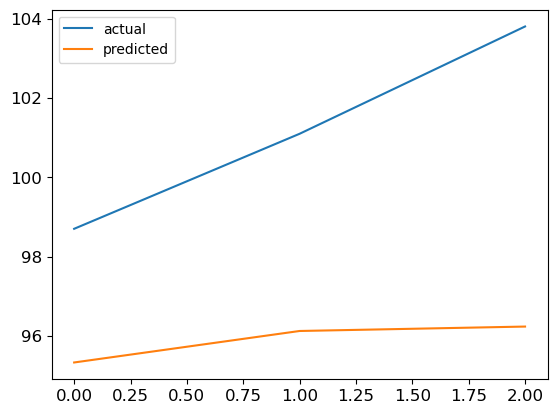

In [66]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [67]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.0448
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.9877
Epoch 3/30
1/1 [==============================] - 0s 8ms/step - loss: 0.9330
Epoch 4/30
1/1 [==============================] - 0s 7ms/step - loss: 0.8803
Epoch 5/30
1/1 [==============================] - 0s 5ms/step - loss: 0.8291
Epoch 6/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7793
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7304
Epoch 8/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6824
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6350
Epoch 10/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5883
Epoch 11/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5423
Epoch 12/30
1/1 [==============================] - 0s 5ms/step - loss: 0.4971
Epoch 13/30
1/1 [==============================] - 0s 4ms/step - loss: 0.4

### Predictions

In [69]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 331ms/step


In [70]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [71]:
lstm = mean_squared_error(comparison['actual'], comparison['predicted'])

In [72]:
performance = pd.concat([performance, pd.DataFrame({'model':"lstm more layers", 'MSE' : lstm}, index =[0])])
performance

,model,MSE
0,Cross NN,23.999500
0,Simple RNN,2.903770
0,Simple RNN more layers,2.092974
0,LSTM,31.218733
0,lstm more layers,21.323980


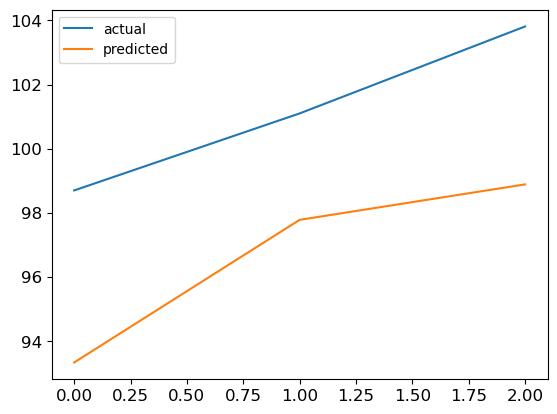

In [73]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [74]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [75]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 936ms/step - loss: 1.0168
Epoch 2/30
1/1 [==============================] - 0s 5ms/step - loss: 0.9229
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 0.8587
Epoch 4/30
1/1 [==============================] - 0s 6ms/step - loss: 0.8086
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7634
Epoch 6/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7214
Epoch 7/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6814
Epoch 8/30
1/1 [==============================] - 0s 7ms/step - loss: 0.6436
Epoch 9/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6086
Epoch 10/30
1/1 [==============================] - 0s 5ms/step - loss: 0.5759
Epoch 11/30
1/1 [==============================] - 0s 5ms/step - loss: 0.5447
Epoch 12/30
1/1 [==============================] - 0s 4ms/step - loss: 0.5135
Epoch 13/30
1/1 [==============================] - 0s 5ms/step - loss: 

### Predictions

In [76]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 122ms/step


In [77]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [78]:
gru_more = mean_squared_error(comparison['actual'], comparison['predicted'])

In [79]:
performance = pd.concat([performance, pd.DataFrame({'model':"GRU more layers", 'MSE' : gru_more}, index =[0])])
performance

,model,MSE
0,Cross NN,23.999500
0,Simple RNN,2.903770
0,Simple RNN more layers,2.092974
0,LSTM,31.218733
0,lstm more layers,21.323980
0,GRU more layers,5.534582


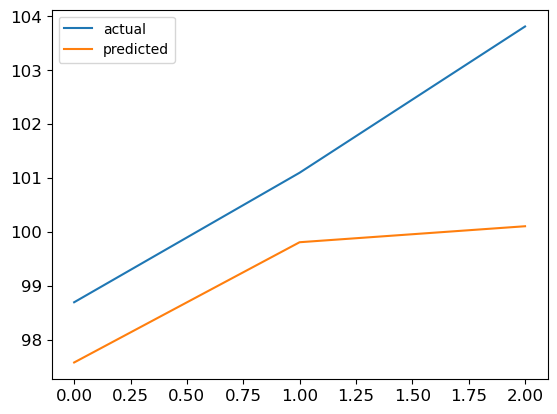

In [80]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [81]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [82]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.9532
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.9193
Epoch 3/30
1/1 [==============================] - 0s 4ms/step - loss: 0.8864
Epoch 4/30
1/1 [==============================] - 0s 4ms/step - loss: 0.8558
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 0.8245
Epoch 6/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7926
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7596
Epoch 8/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7264
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6921
Epoch 10/30
1/1 [==============================] - 0s 5ms/step - loss: 0.6561
Epoch 11/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6188
Epoch 12/30
1/1 [==============================] - 0s 5ms/step - loss: 0.5803
Epoch 13/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5

### Predictions

In [83]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 126ms/step


In [84]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [85]:
conv1d = mean_squared_error(comparison['actual'], comparison['predicted'])

In [86]:
performance = pd.concat([performance, pd.DataFrame({'model':"conv1D", 'MSE' : conv1d}, index =[0])])
performance

,model,MSE
0,Cross NN,23.999500
0,Simple RNN,2.903770
0,Simple RNN more layers,2.092974
0,LSTM,31.218733
0,lstm more layers,21.323980
0,GRU more layers,5.534582
0,conv1D,5.140845


In [87]:
performance.sort_values(by='MSE')

,model,MSE
0,Simple RNN more layers,2.092974
0,Simple RNN,2.903770
0,conv1D,5.140845
0,GRU more layers,5.534582
0,lstm more layers,21.323980
0,Cross NN,23.999500
0,LSTM,31.218733


## Analysis

Firstly, the above results are related to several models that were most likely used to analyze Amazon's stock market data. The models list include Simple RNN, GRU, LSTM, Conv1D, and Cross NN.

Here we have used the metric "MSE - Mean Squared Error" and it calculates the average of the squared differences between expected and actual values in a dataset. A lower MSE suggests that the model is more accurate in predicting results.

According to the results, the "Simple RNN more layers" model had the lowest MSE score of 2.09, closely next by the "Simple RNN" model, which had an MSE score of 2.90. The "Conv1D" and "GRU more layers" models had slightly higher MSE scores of 5.14 and 5.53, respectively, indicating that they were less accurate in making predictions. 
